In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "global-food-wastage-dataset-2018-2024"

### **Table of Contents**   
---------------
✅ **Load Libraries.**   
✅ **Data Import with EDA.**   
✅ **Data Transformation.**  
✅ **Data Visualization.**   
✅ **Prediction Modeling and ML.**    

# **Load Libraries**

In [2]:
library(tidymodels)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)
library(GGally)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6      ✔ rsample      1.2.1 
✔ dials        1.2.1      ✔ tune         1.2.1 
✔ infer        1.0.7      ✔ workflows    1.1.4 
✔ modeldata    1.4.0      ✔ workflowsets 1.1.0 
✔ parsnip      1.2.1      ✔ yardstick    1.3.1 
✔ recipes      1.0.10     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘psych’


The following objects are masked from ‘package:scales’:

    alpha, rescale


The following objects are masked fro

# **1. Data Import**

In [3]:
df <- read.csv('/kaggle/input/global-food-wastage-dataset-2018-2024/global_food_wastage_dataset.csv')  %>% janitor::clean_names()

## **Data Description**
-------------
* **Country**: The name of the country.
* **Year**: Year of data collection (2018-2024).
* **Food Category**: Type of food wasted (Fruits, Dairy, Meat, etc).
* **Total Waste (Tons)**: Total amount of food wasted in tons.
* **Economic Loss (Million $)**: Estimated financial loss in million dollars.
* **Avg Waste per Capita (Kg)**: Average waste per person in kilograms.
* **Population (Million)**: Population of the country in millions.
* **Household Waste (%)**: Percentage of food waste from households.
----------------------

## **Summary**

In [4]:
glimpse(df)

Rows: 5,000
Columns: 8
$ country                 <chr> "Australia", "Indonesia", "Germany", "France",…
$ year                    <int> 2019, 2019, 2022, 2023, 2023, 2024, 2024, 2019…
$ food_category           <chr> "Fruits & Vegetables", "Prepared Food", "Dairy…
$ total_waste_tons        <dbl> 19268.63, 3916.97, 9700.16, 46299.69, 33096.57…
$ economic_loss_million   <dbl> 18686.68, 4394.48, 8909.16, 40551.22, 36980.82…
$ avg_waste_per_capita_kg <dbl> 72.69, 192.52, 166.94, 120.19, 104.74, 136.21,…
$ population_million      <dbl> 87.59, 1153.99, 1006.11, 953.05, 1105.47, 1311…
$ household_waste         <dbl> 53.64, 30.61, 48.08, 31.91, 36.06, 37.09, 68.9…


In [6]:
summary(df)

   country               year      food_category      total_waste_tons 
 Length:5000        Min.   :2018   Length:5000        Min.   :  502.6  
 Class :character   1st Qu.:2019   Class :character   1st Qu.:12783.7  
 Mode  :character   Median :2021   Mode  :character   Median :24865.2  
                    Mean   :2021                      Mean   :25061.8  
                    3rd Qu.:2023                      3rd Qu.:37471.0  
                    Max.   :2024                      Max.   :49990.8  
 economic_loss_million avg_waste_per_capita_kg population_million
 Min.   :  406.7       Min.   : 20.09          Min.   :  11.29   
 1st Qu.:12612.5       1st Qu.: 64.05          1st Qu.: 350.60   
 Median :24428.2       Median :110.08          Median : 713.53   
 Mean   :25039.7       Mean   :109.46          Mean   : 706.61   
 3rd Qu.:37146.0       3rd Qu.:154.53          3rd Qu.:1057.26   
 Max.   :59228.9       Max.   :199.97          Max.   :1399.97   
 household_waste
 Min.   :30.02  


In [7]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
country*,1,5000,10.52580,5.753638,10.000,10.51875,7.41300,1.00,20.00,19.00,0.013293756,-1.211297,0.08136874
year,2,5000,2021.01560,1.999239,2021.000,2021.01950,2.96520,2018.00,2024.00,6.00,-0.006735678,-1.247413,0.02827351
food_category*,3,5000,4.53220,2.332563,5.000,4.54025,2.96520,1.00,8.00,7.00,0.003241279,-1.271939,0.03298743
total_waste_tons,4,5000,25061.78007,14245.119588,24865.220,25022.14203,18317.76022,502.61,49990.76,49488.15,0.024765726,-1.196470,201.45641319
economic_loss_million,5,5000,25039.70387,14620.236429,24428.155,24700.44212,18218.44825,406.69,59228.93,58822.24,0.150330735,-1.020469,206.76136643
avg_waste_per_capita_kg,6,5000,109.46397,51.933730,110.080,109.47617,67.39900,20.09,199.97,179.88,-0.002970730,-1.202090,0.73445385
population_million,7,5000,706.60642,402.546464,713.530,707.12817,521.23027,11.29,1399.97,1388.68,-0.017559040,-1.209687,5.69286668
household_waste,8,5000,50.06089,11.596203,50.295,50.09633,14.84824,30.02,70.00,39.98,-0.037851330,-1.211873,0.16399508


In [8]:
skim_df <- skimr::skim(df)
print(skim_df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             5000  
Number of columns          8     
_______________________          
Column type frequency:           
  character                2     
  numeric                  6     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 country               0             1   2  12     0       20          0
2 food_category         0             1   9  19     0        8          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable           n_missing complete_rate    mean       sd     p0
1 year                            0             1  2021.      2.00 2018  
2 total_waste_tons                0             1 25062.  14245.    503. 
3 economic_

## **Checking Missing Value & Duplicate Value**

In [9]:
na <- data.frame(Na_Count = colSums(is.na(df)))
na

,Na_Count
,<dbl>
country,0
year,0
food_category,0
total_waste_tons,0
economic_loss_million,0
avg_waste_per_capita_kg,0
population_million,0
household_waste,0


In [10]:
sum(duplicated(df))

[1] 0

In [11]:
head(df)

,country,year,food_category,total_waste_tons,economic_loss_million,avg_waste_per_capita_kg,population_million,household_waste
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Australia,2019,Fruits & Vegetables,19268.63,18686.68,72.69,87.59,53.64
2,Indonesia,2019,Prepared Food,3916.97,4394.48,192.52,1153.99,30.61
3,Germany,2022,Dairy Products,9700.16,8909.16,166.94,1006.11,48.08
4,France,2023,Fruits & Vegetables,46299.69,40551.22,120.19,953.05,31.91
5,France,2023,Beverages,33096.57,36980.82,104.74,1105.47,36.06
6,India,2024,Fruits & Vegetables,11962.89,11196.04,136.21,1311.91,37.09


In [12]:
tail(df)

,country,year,food_category,total_waste_tons,economic_loss_million,avg_waste_per_capita_kg,population_million,household_waste
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4995,Indonesia,2023,Prepared Food,39980.40,37618.45,32.34,27.08,56.38
4996,France,2021,Beverages,47524.74,48058.40,77.41,1087.46,39.73
4997,Australia,2021,Beverages,32337.72,32705.08,194.35,1336.32,64.83
4998,China,2018,Meat & Seafood,20640.96,22485.33,21.04,16.13,31.23
4999,Australia,2021,Beverages,26566.64,29357.57,197.14,1086.17,69.95
5000,France,2024,Bakery Items,8860.27,7360.38,51.50,879.67,54.27


# **2. Data Transformation**

In [13]:
# Data Type Conversion (Character -> Factor)

df <- df %>% mutate(across(
    c(
        where(is.character)
     ),
    ~as.factor(.x)
    ))

# **3. Data Visualization**

In [14]:
num_cols <- df %>% select(where(is.numeric)) %>% colnames()
cat_cols <- df %>% select(where(is.factor)) %>% colnames()

In [15]:
cat('num_cols :', num_cols,'\n')
cat('cat_cols :', cat_cols)

num_cols : year total_waste_tons economic_loss_million avg_waste_per_capita_kg population_million household_waste 
cat_cols : country food_category

## **Histogram & Boxplot & Densityplot**

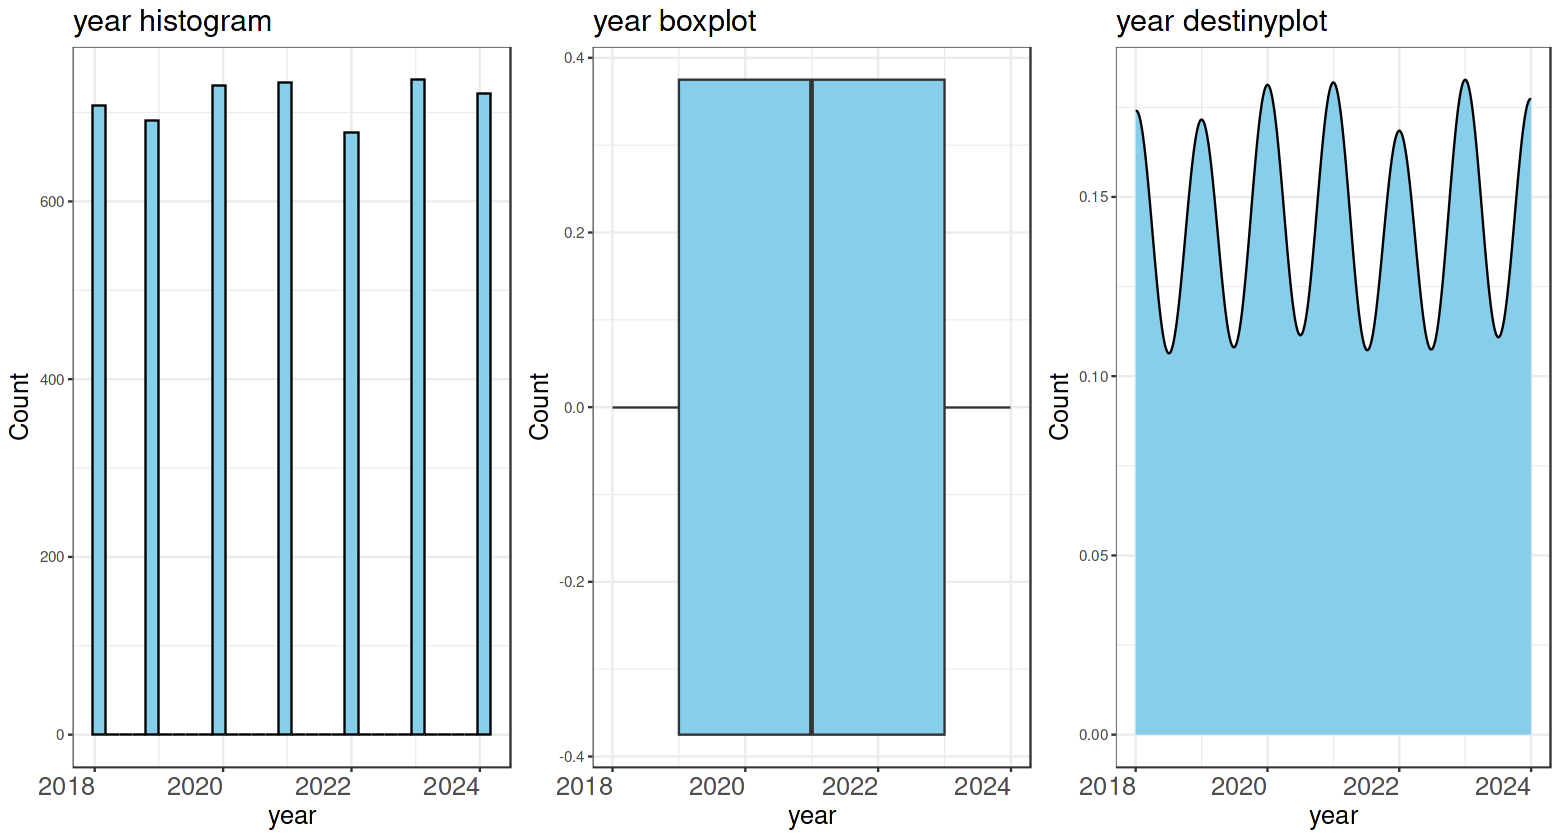

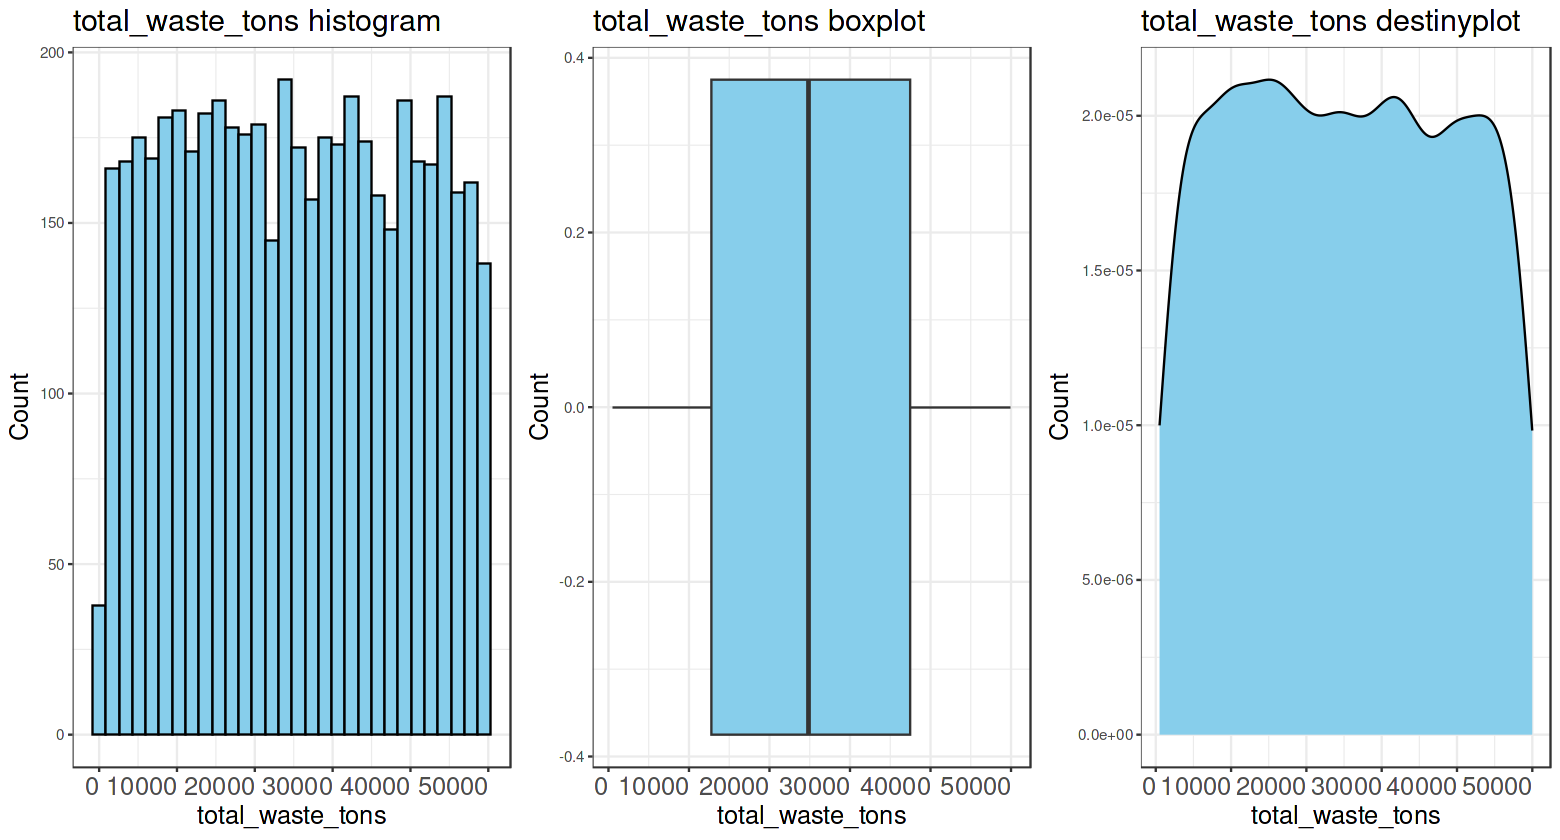

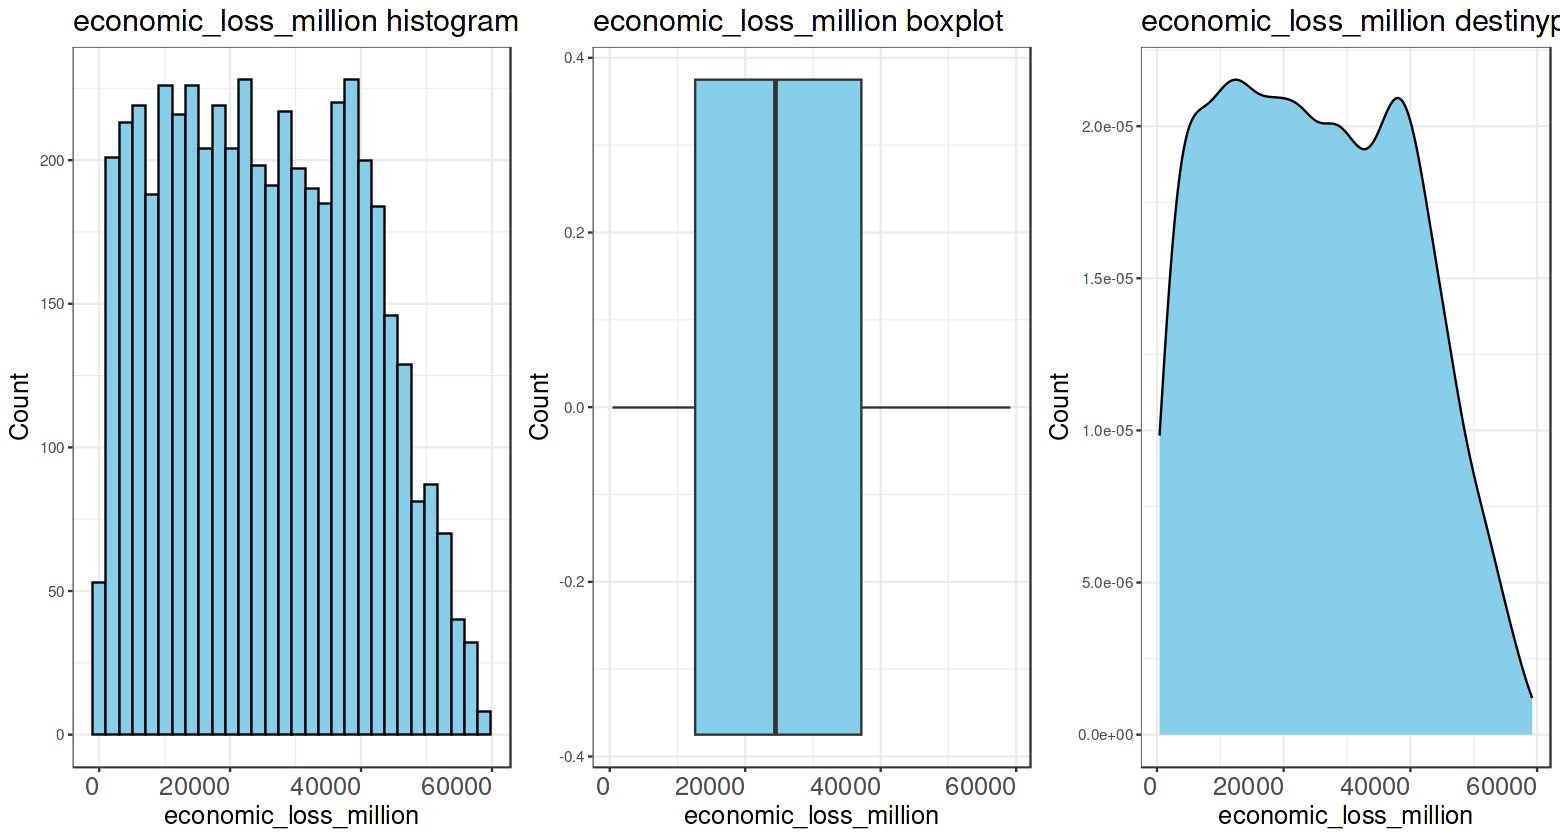

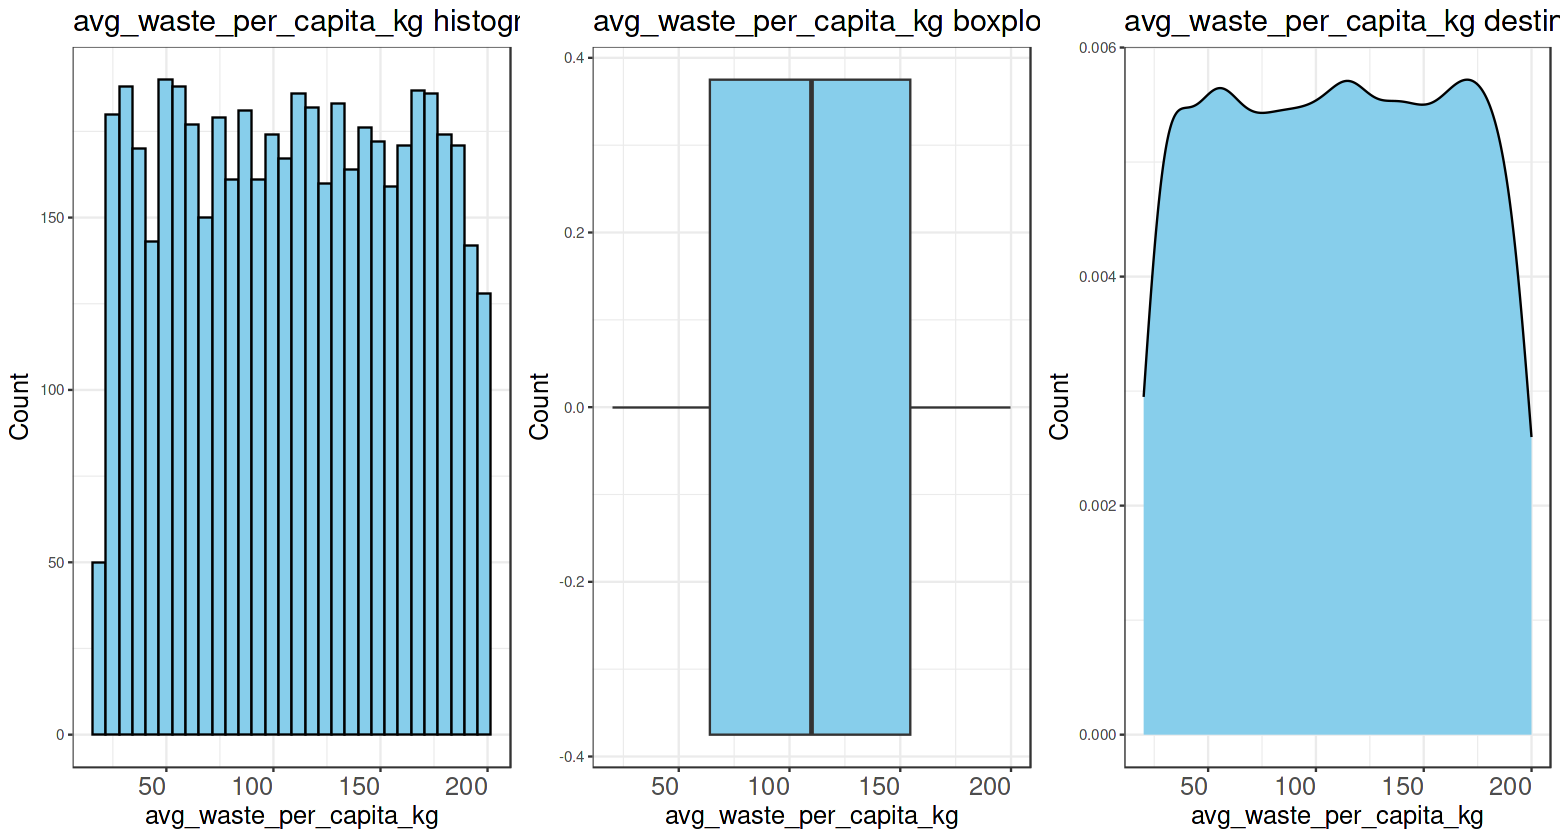

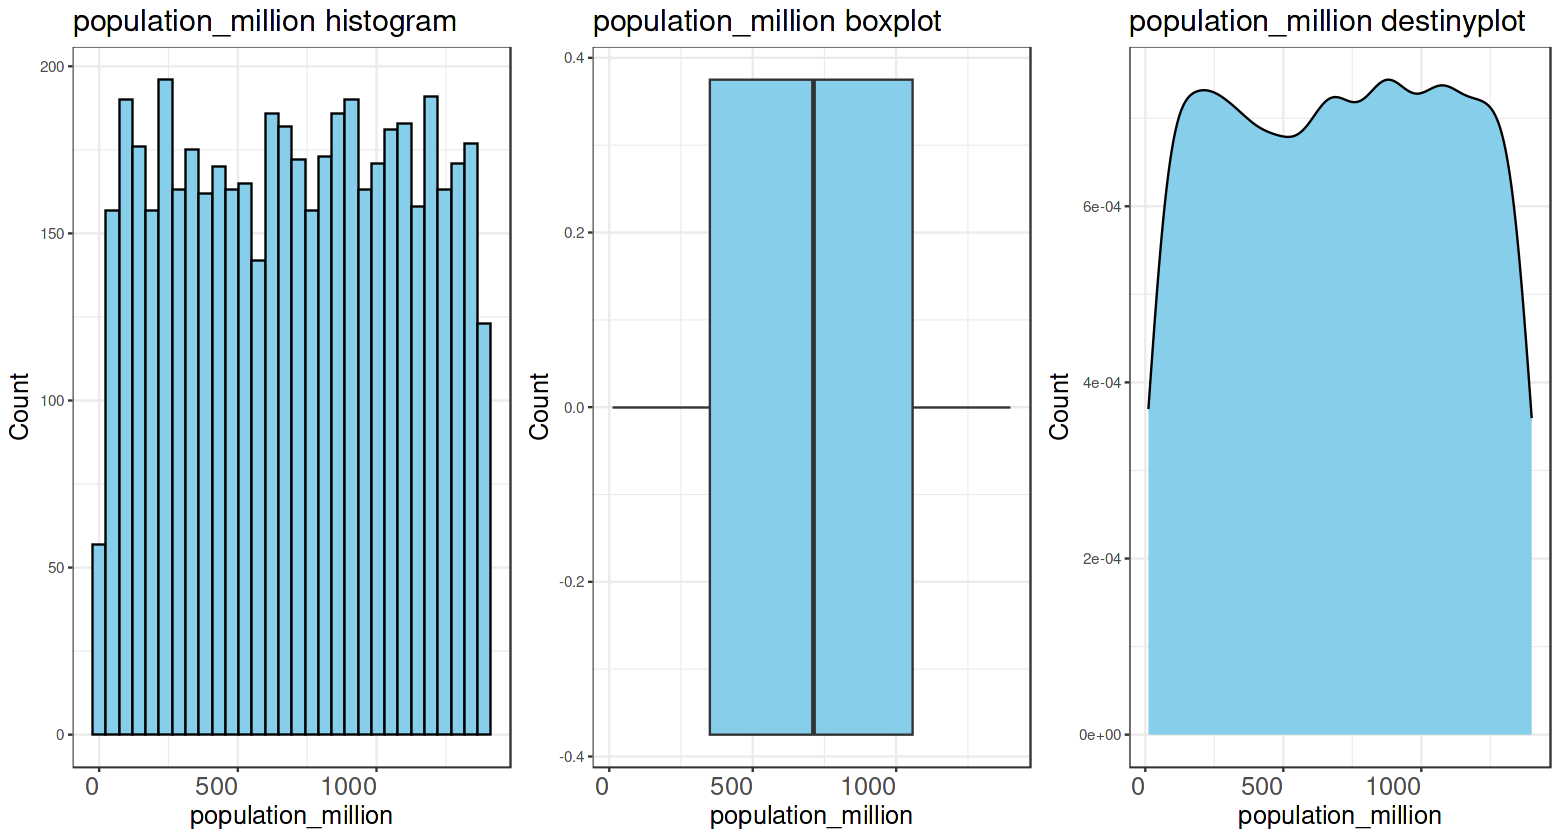

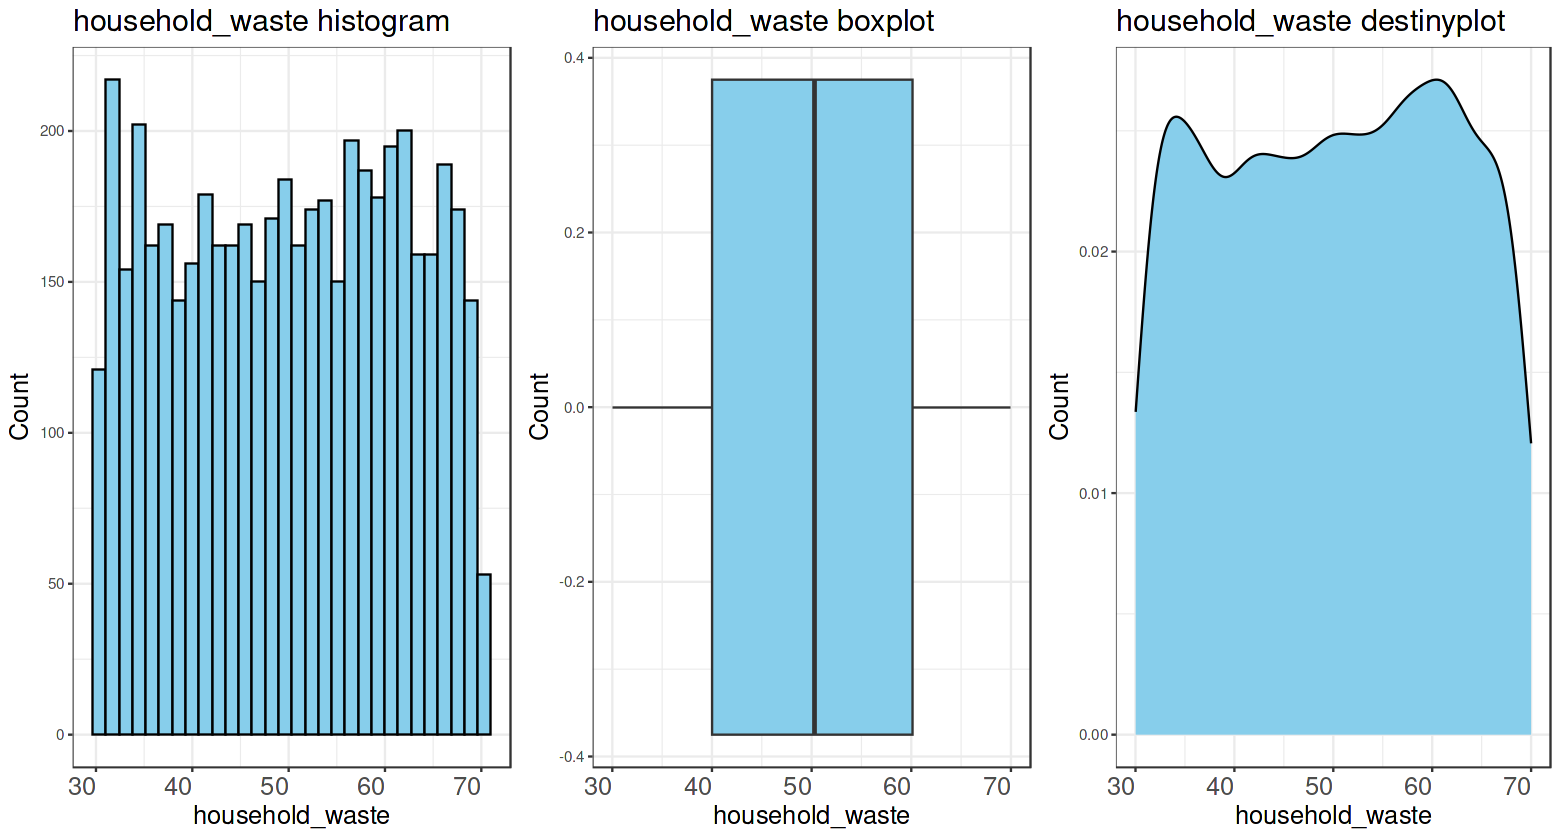

In [16]:
options(repr.plot.width = 13.0, repr.plot.height = 7.0)

for(i in num_cols){
    a <- ggplot(df) + geom_histogram(aes(x= df[,i]), fill = 'skyblue', col = 'black', position = 'dodge', bins= 30) + 
            labs(title = paste0(names(df[i]),' histogram'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
    
    b <- ggplot(df) + geom_boxplot(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' boxplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 

    c <- ggplot(df) + geom_density(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' destinyplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 
    
    grid.arrange(a,b ,c, ncol = 3)    
}

* **As a result of checking the boxplot, there are not outliers.**
* **Histograms and density graphs show the distribution of the data.**

## **CountPlot**

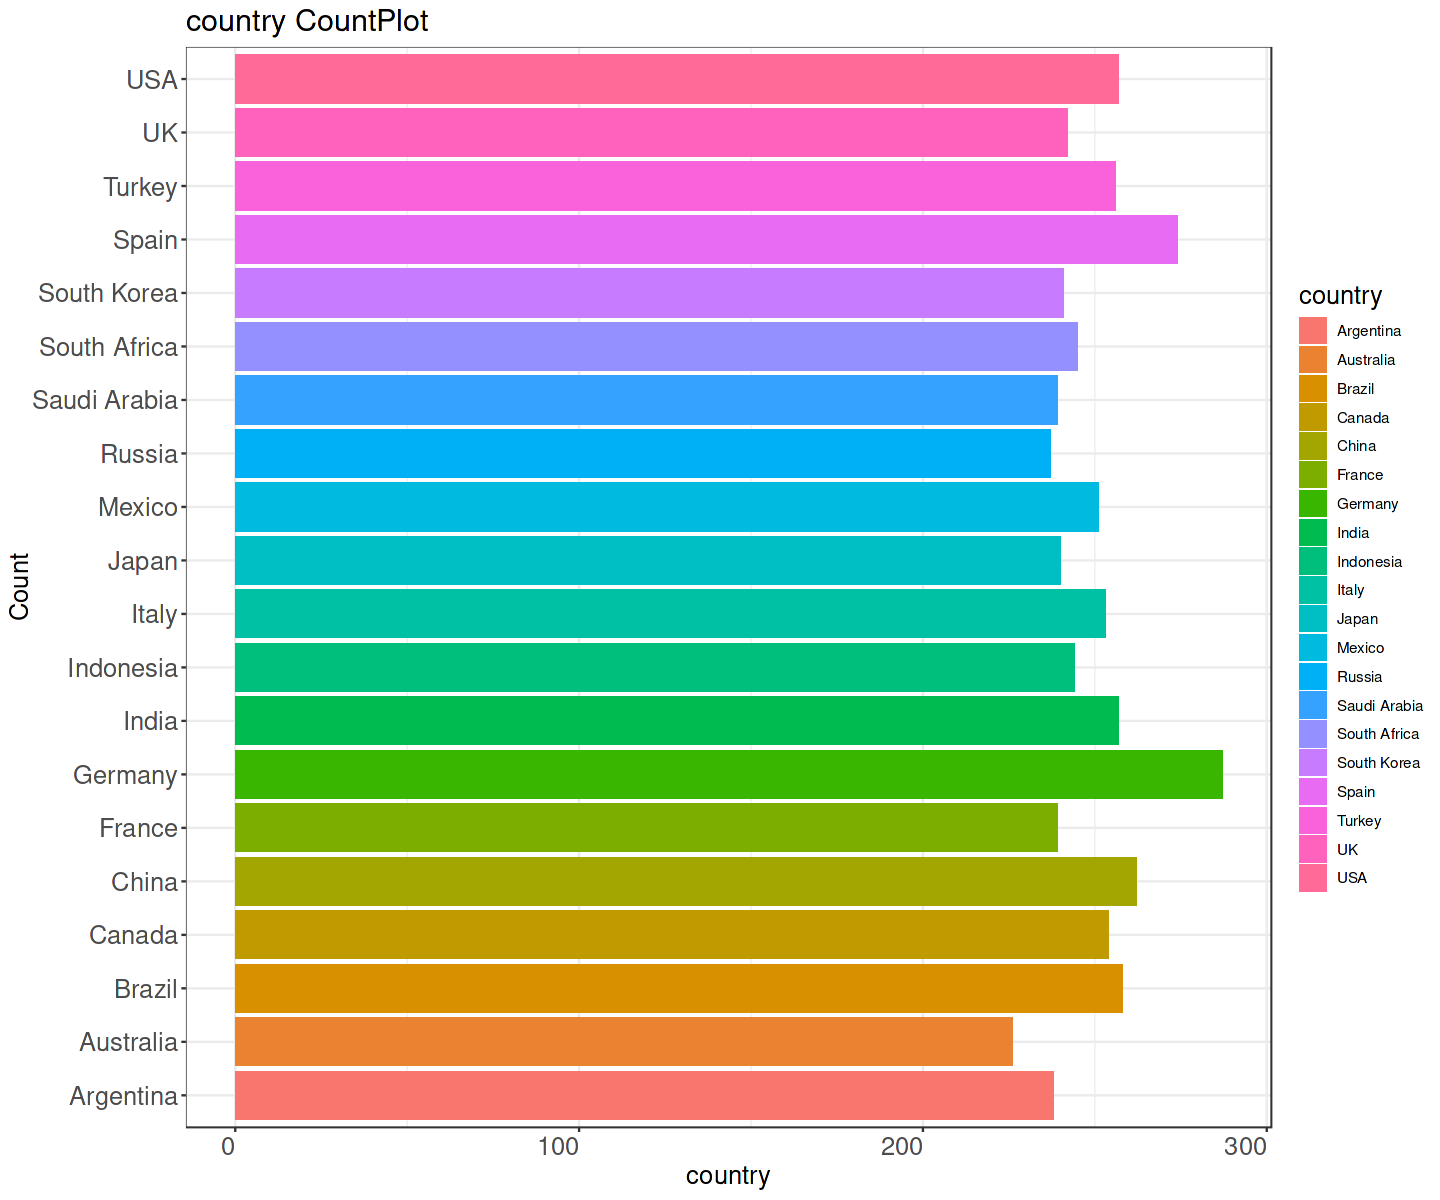

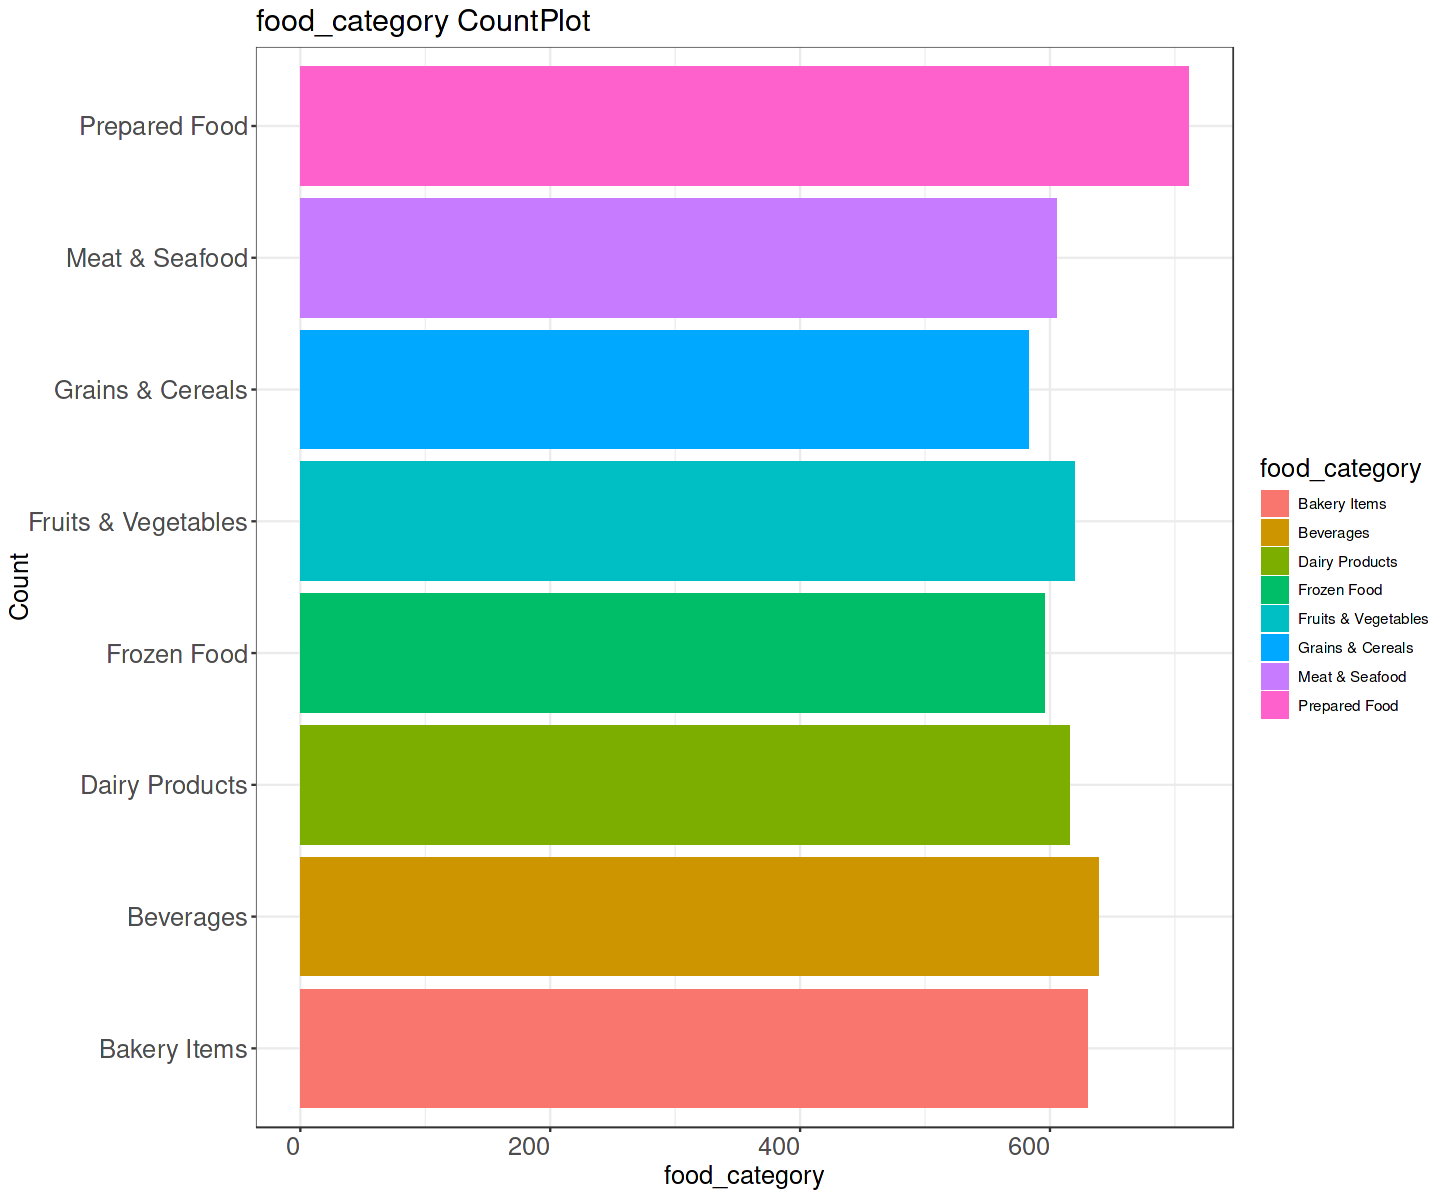

In [17]:
options(repr.plot.width = 12.0, repr.plot.height = 10.0)

for(i in cat_cols){
    a <- ggplot(df) + geom_bar(aes(y = df[,i], fill = df[,i])) + 
            labs(title = paste0(names(df[i]),' CountPlot'), x = names(df[i]), y = 'Count', fill = i ) + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            axis.text.y = element_text(size = 15, hjust=1)      ,
            title = element_text(size=15)
            )
    grid.arrange(a, ncol = 1)  
}

## **Correlation**

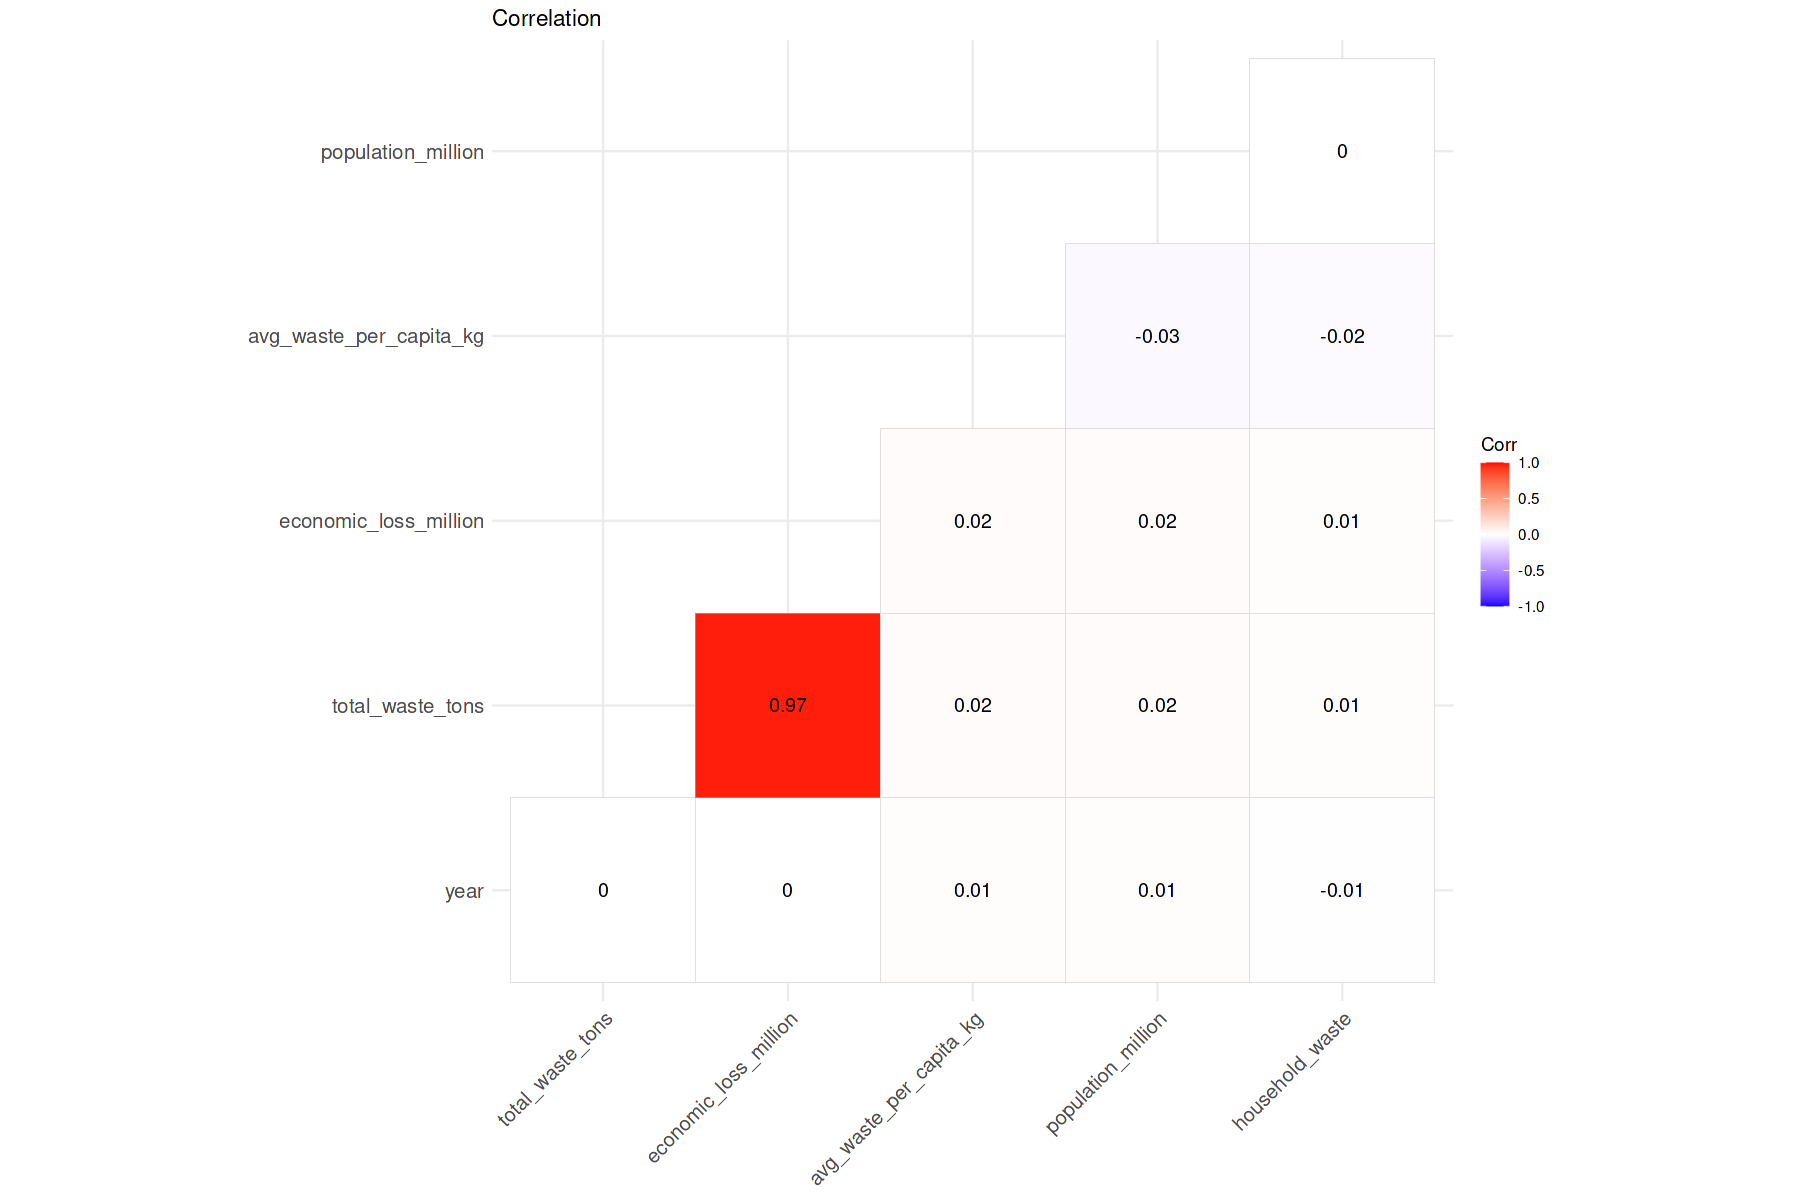

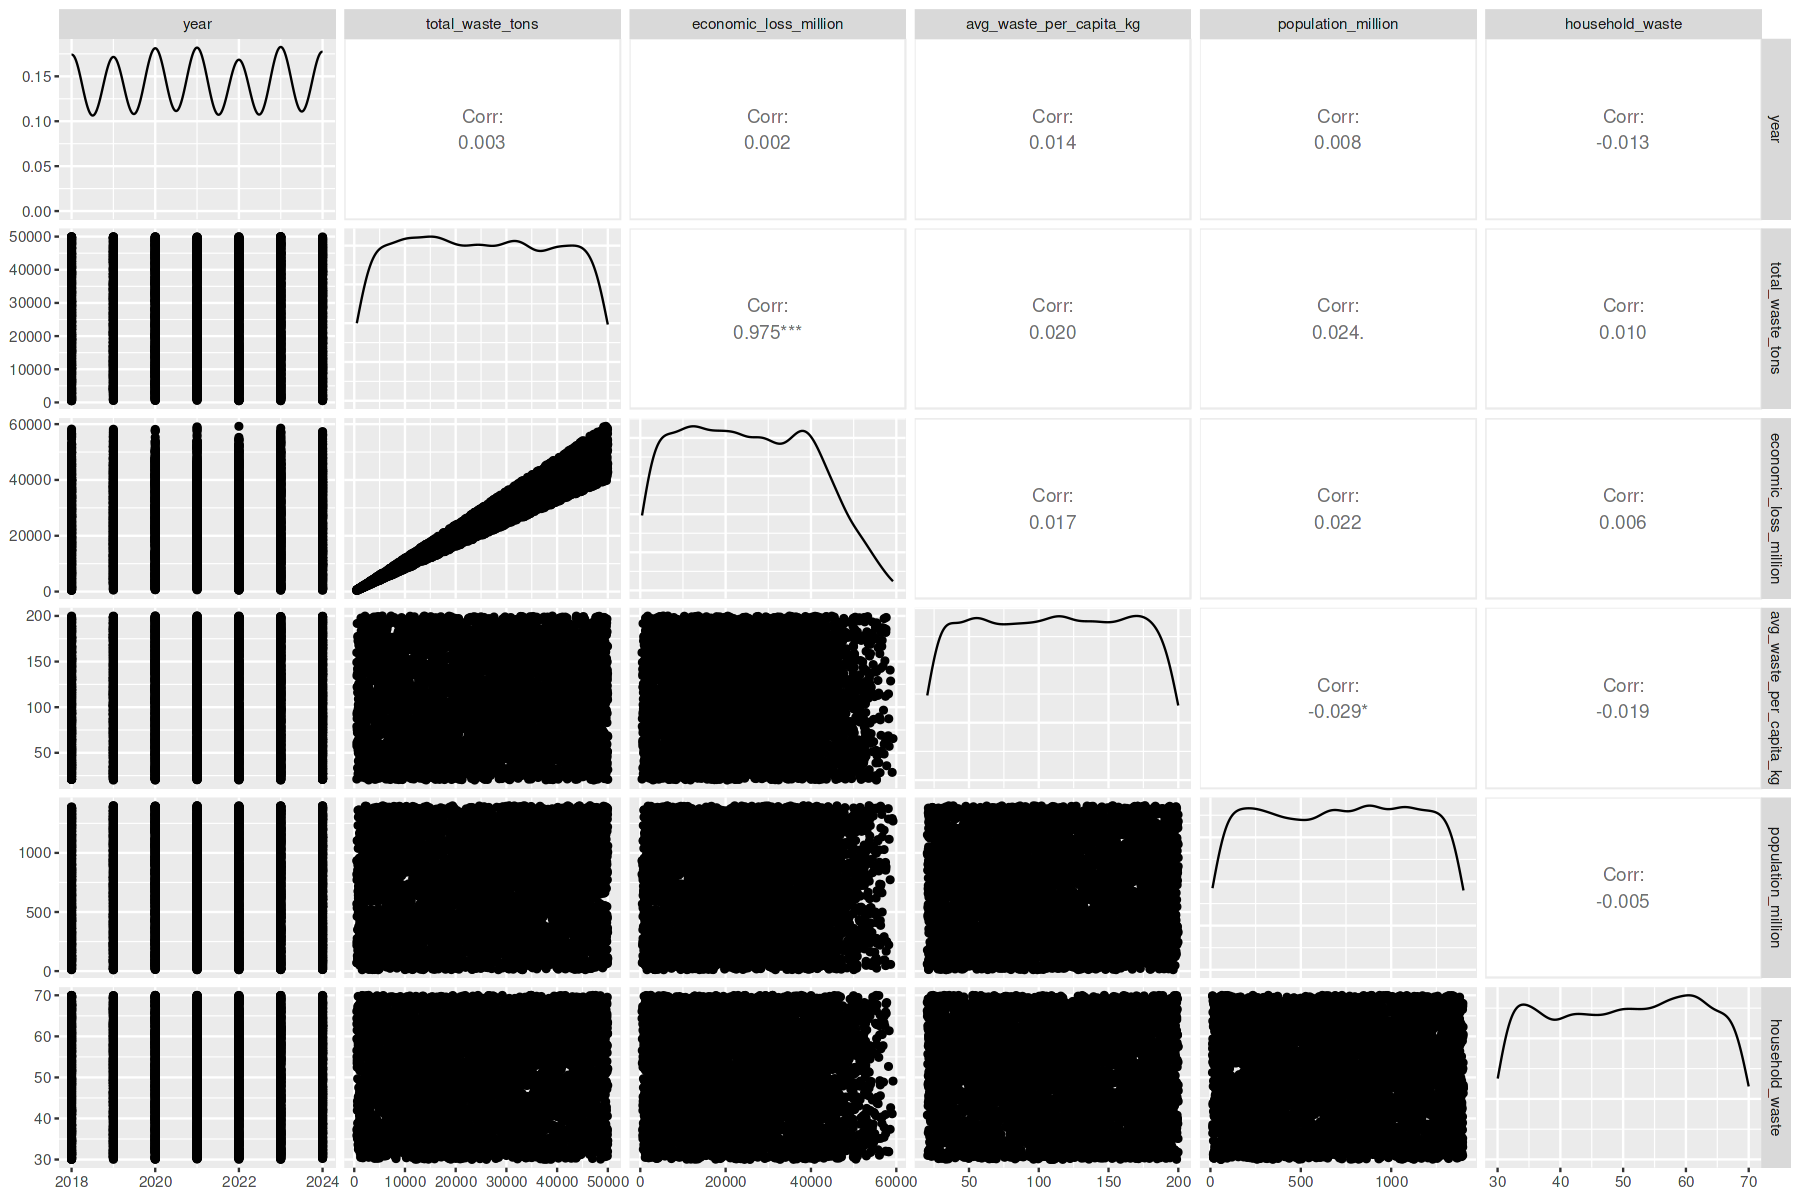

In [18]:
options(repr.plot.width = 15.0, repr.plot.height = 10.0)
ggcorrplot(cor(df[,num_cols], method = 'pearson') , type = "lower", lab=T, title = 'Correlation')

ggpairs(df[,num_cols])

* **Total_waste_tons and economic_loss_millions have a strong positive correlation.**

## **Changes in Korea by Year**

In [66]:
korea_waste <- df %>% 
            filter(country == 'South Korea') %>%
            group_by(year) %>% 
            summarize(avg_waste = mean(total_waste_tons , na.rm=T))

korea_economic_loss <- df %>% 
            filter(country == 'South Korea') %>% 
            group_by(year) %>% 
            summarize(avg_economic_loss = mean(economic_loss_million, na.rm=T))

korea_avg_waste_per_capita_kg <- df %>% 
            filter(country == 'South Korea') %>% 
            group_by(year) %>% 
            summarize(avg_waste_per_capita_kg = mean(avg_waste_per_capita_kg, na.rm=T))

korea_avg_population_million <- df %>% 
            filter(country == 'South Korea') %>% 
            group_by(year) %>% 
            summarize(avg_population_million = mean(population_million, na.rm=T))

korea_avg_household_waste <- df %>% 
            filter(country == 'South Korea') %>% 
            group_by(year) %>% 
            summarize(avg_household_waste = mean(household_waste, na.rm=T))


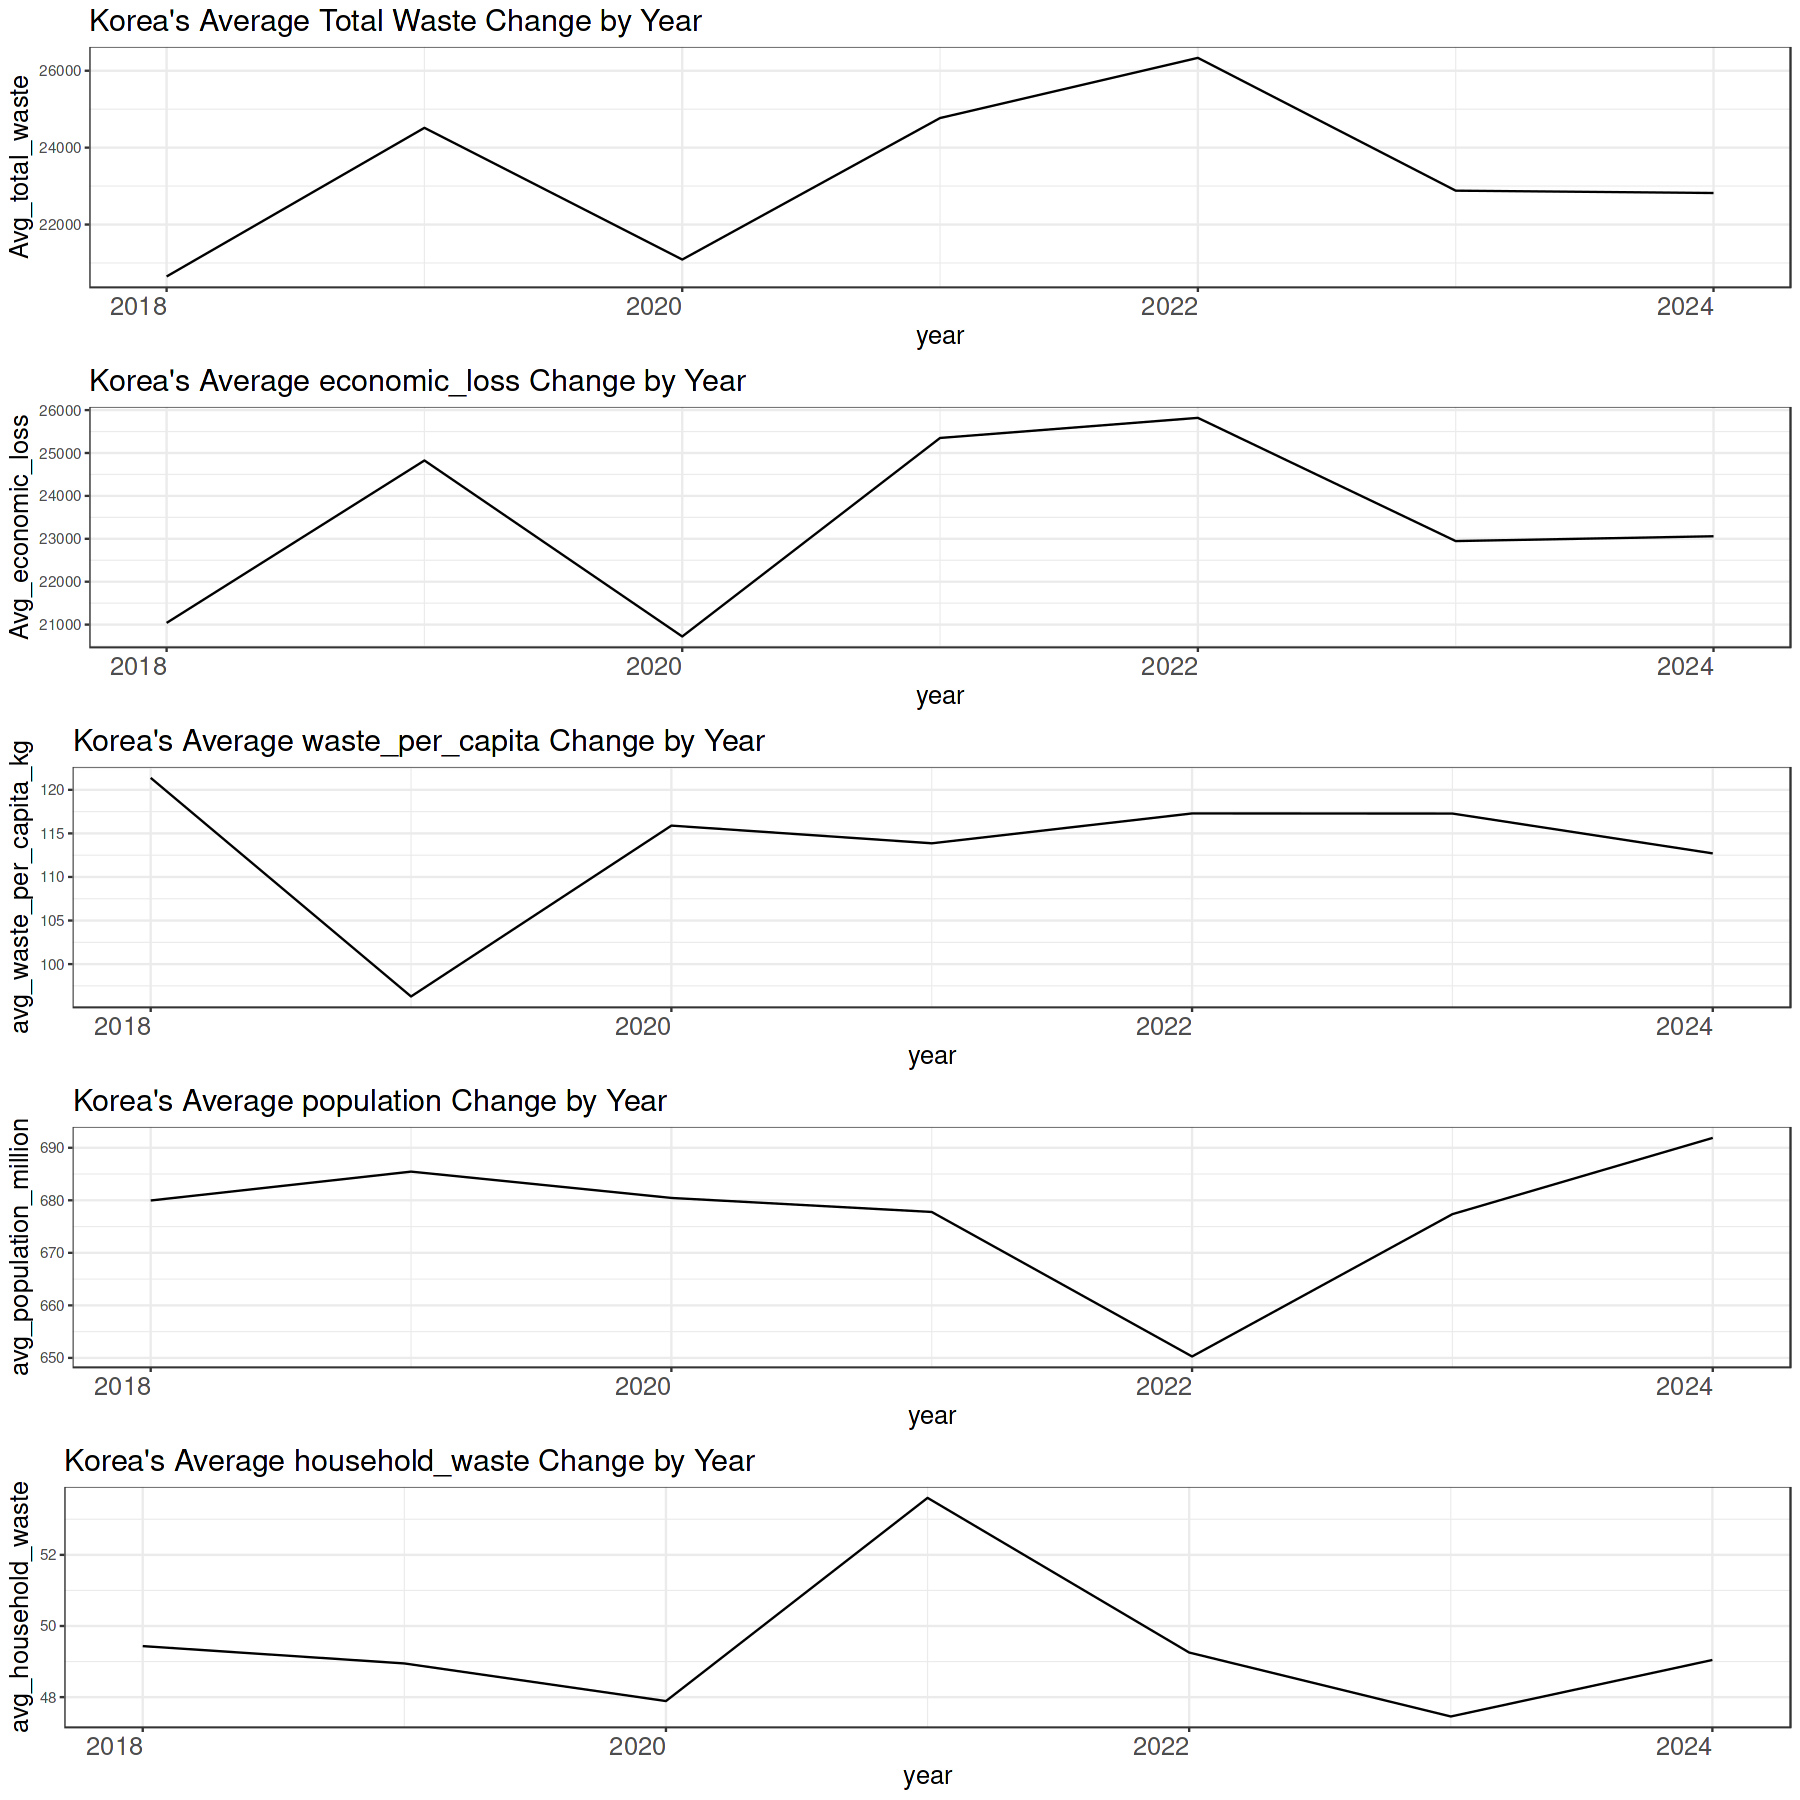

In [69]:
options(repr.plot.width = 15.0, repr.plot.height = 15.0)

a <- ggplot(korea_waste) + geom_line(aes(x = year, y = avg_waste)) +
            labs(title = 'Korea\'s Average Total Waste Change by Year', y = 'Avg_total_waste') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

b <- ggplot(korea_economic_loss) + geom_line(aes(x = year, y = avg_economic_loss)) +
            labs(title = 'Korea\'s Average economic_loss Change by Year', y = 'Avg_economic_loss') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

c <- ggplot(korea_avg_waste_per_capita_kg) + geom_line(aes(x = year, y = avg_waste_per_capita_kg)) +
            labs(title = 'Korea\'s Average waste_per_capita Change by Year', y = 'avg_waste_per_capita_kg') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

d <- ggplot(korea_avg_population_million) + geom_line(aes(x = year, y = avg_population_million)) +
            labs(title = 'Korea\'s Average population Change by Year', y = 'avg_population_million') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

e <- ggplot(korea_avg_household_waste) + geom_line(aes(x = year, y = avg_household_waste)) +
            labs(title = 'Korea\'s Average household_waste Change by Year', y = 'avg_household_waste') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

grid.arrange(a,b,c,d,e , ncol = 1)

# **4. Modeling**

In [72]:
library(caret)
library(Metrics)

## **Model to use**
--------------
### 1. **Linear Regression.**
### 2. **Regularized Linear Regression.**
### 3. **Extreme Gradient Boosting.**

## **Train Test Split**

In [81]:
split <- rsample::initial_split(df, prop = 0.8)
train <- rsample::training(split)
test <- rsample::testing(split)

## **Recipe**

In [82]:
rec <- recipe(economic_loss_million ~ ., data = train) %>%
    recipes::step_dummy(all_nominal_predictors()) %>% 
    recipes::step_normalize(all_numeric_predictors()) %>%
    recipes::step_zv(all_predictors()) %>% 
    recipes::step_corr(all_predictors(), threshold = 0.8)

## **5-Fold**

In [83]:
set.seed(123)
folds <- 
    train %>%
    vfold_cv(v = 5, strata = economic_loss_million)

## **LinearRegression**

In [84]:
# Model
lm <- linear_reg()

# Workflow
lm_wf <- workflow() %>%
  add_recipe(rec) %>% 
  add_model(lm)

# Fit
lm_fit <- lm_wf %>% 
  fit(data = train)

In [89]:
# Predict
lm_pred <- lm_fit %>%
  predict(new_data = test)

In [90]:
lm_mse <- mse(test$economic_loss_million , lm_pred$.pred)
lm_rmse <- rmse(test$economic_loss_million , lm_pred$.pred)
lm_mae <- mae(test$economic_loss_million ,lm_pred$.pred)
lm_r2 <- R2(test$economic_loss_million ,lm_pred$.pred)

In [95]:
options(scipen = 10000)

lm_score <- data.frame(Indicators = c('MSE','RMSE','MAE','R2') , Score = c(lm_mse,lm_rmse ,lm_mae, lm_r2 ))
lm_score

Indicators,Score
<chr>,<dbl>
MSE,11098001.2404398210
RMSE,3331.3662723333
MAE,2471.7136197346
R2,0.9486772403


## **Regularized Linear Regression**
LASSO, This is L1 where penalty = 1, Ridge, This is L2 where penalty = 0 ,  Elastic Net, This is both LASSO and Ridge where penalty and mixture are arbitrary or being tuned

In [98]:
# Model
lm_en <- linear_reg(
  penalty = tune(),
  mixture = tune()
) %>%  
    set_engine("glmnet") %>% 
    set_mode("regression")

# Workflow
lm_en_wf <- workflow() %>% 
  add_recipe(rec) %>%  
  add_model(lm_en)

# Tune
lm_en_grid <- grid_regular(
  penalty(range = c(-3, 1)),
  mixture(range = c(0, 1))
)

lm_en_tune <- tune_grid(
  lm_en_wf,
  resamples = folds,
  grid = lm_en_grid,
  metrics = metric_set(yardstick::rsq),
  control = control_grid(save_pred = TRUE)
)

# Select the best
best_lm_en <- select_best(lm_en_tune, metric = "rsq")
final_lm_en <- finalize_workflow(lm_en_wf, best_lm_en)

# Fit
lm_en_fit <- final_lm_en %>%  
  fit(data = train)


In [99]:
# Predict
lm_en_pred <- lm_en_fit  %>%
  predict(new_data = test)

In [100]:
lm_en_mse <- mse(test$economic_loss_million , lm_en_pred$.pred)
lm_en_rmse <- rmse(test$economic_loss_million , lm_en_pred$.pred)
lm_en_mae <- mae(test$economic_loss_million ,lm_en_pred$.pred)
lm_en_r2 <- R2(test$economic_loss_million ,lm_en_pred$.pred)

In [101]:
lm_en_score <- data.frame(Indicators = c('MSE','RMSE','MAE','R2') , Score = c(lm_en_mse,lm_en_rmse ,lm_en_mae, lm_en_r2))
lm_en_score

Indicators,Score
<chr>,<dbl>
MSE,11048032.9523710739
RMSE,3323.8581426365
MAE,2462.0633703103
R2,0.9489113474


### **Extreme Gradient Boosting**

In [102]:
# Model
xgb <-
  boost_tree(
    trees = tune(),
    tree_depth = tune(),
    learn_rate = tune(),
    mtry = tune(),
    min_n = tune(),
    loss_reduction = tune()
  ) %>%
  set_engine(engine = "xgboost", ) %>%
  set_mode(mode = "regression")

# Workflow
xgb_wf <- workflow() %>%
  add_recipe(rec) %>% 
  add_model(xgb)

# params
params <- xgb_wf %>%
  extract_parameter_set_dials() %>%
  update(
    trees = trees(range = c(200, 1500)),
    mtry = mtry(range = c(5, 20)),
    min_n = min_n(range = c(10, 90)),
    tree_depth = tree_depth(range = c(11, 20)),
    learn_rate = learn_rate(range = c(-2,3))
  ) %>%
  finalize(train)

#Controol
xgb_ctrl <- control_grid(verbose = TRUE,
                         save_pred = TRUE,
                         save_workflow = TRUE)

#Tune
xgb_tune <- tune_grid(
  xgb_wf,
  resamples = folds,
  grid = 4,
  control = xgb_ctrl,
  metrics = metric_set(rsq),
  param_info = params
)

# Select the best
best_xgb <- select_best(xgb_tune, metric = "rsq")
final_xgb <- finalize_workflow(xgb_wf, best_xgb)

# Fit
xgb_fit <- final_xgb %>% 
  fit(data = train)

# Predict
xgb_pred <- xgb_fit %>% 
  predict(new_data = test)

i Fold1: preprocessor 1/1

✓ Fold1: preprocessor 1/1

i Fold1: preprocessor 1/1, model 1/4

✓ Fold1: preprocessor 1/1, model 1/4

i Fold1: preprocessor 1/1, model 1/4 (extracts)

i Fold1: preprocessor 1/1, model 1/4 (predictions)

i Fold1: preprocessor 1/1, model 2/4

✓ Fold1: preprocessor 1/1, model 2/4

i Fold1: preprocessor 1/1, model 2/4 (extracts)

i Fold1: preprocessor 1/1, model 2/4 (predictions)

i Fold1: preprocessor 1/1, model 3/4

✓ Fold1: preprocessor 1/1, model 3/4

i Fold1: preprocessor 1/1, model 3/4 (extracts)

i Fold1: preprocessor 1/1, model 3/4 (predictions)

i Fold1: preprocessor 1/1, model 4/4

✓ Fold1: preprocessor 1/1, model 4/4

i Fold1: preprocessor 1/1, model 4/4 (extracts)

i Fold1: preprocessor 1/1, model 4/4 (predictions)

! Fold1: internal:
  A correlation computation is required, but the inputs are siz...
  the standard deviation cannot be computed. `NA` will be returned.

✓ Fold1: internal

i Fold2: preprocessor 1/1

✓ Fold2: preprocessor 1/1

i Fold2: p

In [103]:
xgb_mse <- mse(test$economic_loss_million , xgb_pred$.pred)
xgb_rmse <- rmse(test$economic_loss_million ,xgb_pred$.pred)
xgb_mae <- mae(test$economic_loss_million ,xgb_pred$.pred)
xgb_r2 <- R2(test$economic_loss_million ,xgb_pred$.pred)

In [104]:
xgb_score <- data.frame(Indicators = c('MSE','RMSE','MAE','R2') , Score = c(xgb_mse,xgb_rmse ,xgb_mae, xgb_r2 ))
xgb_score

Indicators,Score
<chr>,<dbl>
MSE,15525572.1356784217
RMSE,3940.2502630770
MAE,2936.7910584851
R2,0.9286020024


## **Evaluation & Comparison**

In [105]:
#overall score
overall_score <- data.frame(Model = c('Linear','Reg_Linear','Xgb'), 
                            RMSE_Score = c(lm_rmse,lm_en_rmse , xgb_rmse),
                            R2_Score = c(lm_r2,lm_en_r2, xgb_r2))

In [106]:
overall_score

Model,RMSE_Score,R2_Score
<chr>,<dbl>,<dbl>
Linear,3331.366272,0.9486772403
Reg_Linear,3323.858143,0.9489113474
Xgb,3940.250263,0.9286020024



**1. XGB Model has low RMSE and Regularized Linear Model has high RMSE.Therefore,Regularized Linear Model is Best Model.**



**2. If the R2 score is low, it means that the model does not explain the data well.However, All models have high R2 scores, which means that the model describes the data well.**


----------------------

**Thankyou. Please leave your advice in the comments**